In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sn


In [ ]:
dataset = pd.read_csv('drive/MyDrive/Colab Notebooks/Kernel_SVM.csv')
dataset.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
# create training and testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [ ]:
# normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# create SVM model
classifier = SVC(kernel = 'rbf', gamma=0.5, random_state = 0)
classifier.fit(X_train, y_train)

# predict testing data
y_pred = classifier.predict(X_test)


In [ ]:
# show confusion matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
acc = accuracy_score(y_test, y_pred)
# print('accuracy:', acc)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



[Text(33.0, 0.5, 'True Label'), Text(0.5, 15.0, 'Predicted Label')]

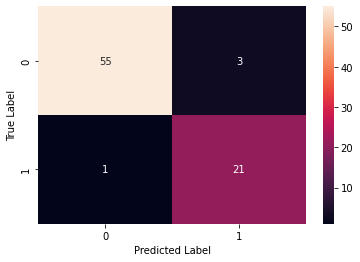

In [ ]:
hm = sn.heatmap(cm, annot=True, fmt='g')
hm.set(ylabel='True Label', xlabel='Predicted Label',)

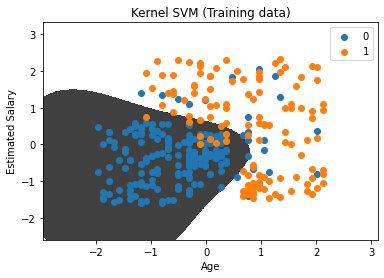

In [ ]:
# visualize the training data
X1, X2 = np.meshgrid(np.arange(start = X_train[:, 0].min() - 1, stop = X_train[:, 0].max() + 1, 
                               step = 0.01), np.arange(start = X_train[:, 1].min() - 1, 
                                                       stop = X_train[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.75, cmap = ListedColormap(('black', 'white')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


# ploting scattered graph for the values
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], label = j)

plt.title('Kernel SVM (Training data)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

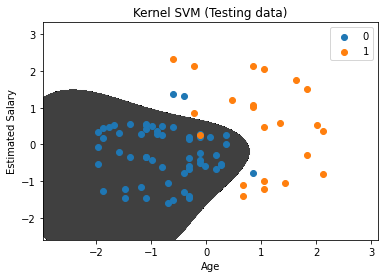

In [ ]:
# visualize the test data
X1, X2 = np.meshgrid(np.arange(start = X_test[:, 0].min() - 1, stop = X_test[:, 0].max() + 1, 
                               step = 0.01), np.arange(start = X_train[:, 1].min() - 1, 
                                                       stop = X_train[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


# ploting scattered graph for the values
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1], label = j)

plt.title('Kernel SVM (Testing data)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()